In [27]:
# Import Necessary Libraries
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

In [28]:
# Read the csv files
data = pd.read_csv("data.csv")
data_w_genre = pd.read_csv('data_w_genres.csv')

In [29]:
# First dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [30]:
# Second dataset information
data_w_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [31]:
# Merging the two dataframes
new = pd.merge(data,data_w_genre,on=["acousticness","danceability", "duration_ms", "energy", "instrumentalness" ,"liveness" ,"loudness" ,"speechiness" ,"tempo", "valence", "popularity", "key", "mode"]).drop(["artists_y","count"],axis=1)
new = new.rename(columns = {'artists_x':'artists'})

In [32]:
# Merged dataset information
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13402 entries, 0 to 13401
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           13402 non-null  float64
 1   year              13402 non-null  int64  
 2   acousticness      13402 non-null  float64
 3   artists           13402 non-null  object 
 4   danceability      13402 non-null  float64
 5   duration_ms       13402 non-null  int64  
 6   energy            13402 non-null  float64
 7   explicit          13402 non-null  int64  
 8   id                13402 non-null  object 
 9   instrumentalness  13402 non-null  float64
 10  key               13402 non-null  int64  
 11  liveness          13402 non-null  float64
 12  loudness          13402 non-null  float64
 13  mode              13402 non-null  int64  
 14  name              13402 non-null  object 
 15  popularity        13402 non-null  int64  
 16  release_date      13402 non-null  object

In [33]:
# Merged dataset
new

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,genres
0,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.30900,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,[]
1,0.4930,1921,0.99000,['Georgel'],0.315,190800,0.36300,0,0H3k2CvJvHULnWChlbeFgx,0.000000,5,0.2920,-12.562,0,La Vipère,0,1921,0.0546,174.532,[]
2,0.4930,1921,0.01750,['Zay Gatsby'],0.527,205072,0.69100,1,0MJZ4hh60zwsYleWWxT5yW,0.384000,7,0.3580,-7.298,1,Power Is Power,0,1921-03-27,0.0326,159.935,[]
3,0.2400,1921,0.99400,"['John McCormack', 'Edwin Schneider']",0.400,187333,0.15500,0,0RPKAq5yhbom6hXQz5qo6L,0.000043,4,0.1030,-13.976,1,Mother Machree,0,1921,0.0873,170.251,[]
4,0.9590,1921,0.95100,['Louis Boucot'],0.823,169267,0.32900,0,2EV71z9RFz15SDR8WezEXG,0.000000,5,0.0646,-12.853,1,Une Canne Et Des Gants,0,1921,0.1430,119.061,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13397,0.3290,2020,0.10900,['LPB Poody'],0.903,146688,0.61100,1,1FgPyHX7HruKDL4Tx4MeZB,0.000199,10,0.0904,-8.006,0,Address It,68,2020-05-05,0.2680,94.525,['florida rap']
13398,0.6940,2020,0.06990,"['Loud Luxury', 'Frank Walker', 'Stephen Puth']",0.759,176389,0.84500,0,5seWZTjT0U8a7cy3Y5NJQ9,0.000087,6,0.2150,-6.794,0,Like Gold,69,2020-10-30,0.0421,124.000,['pop edm']
13399,0.6940,2020,0.06990,"['Loud Luxury', 'Frank Walker', 'Stephen Puth']",0.759,176389,0.84500,0,5seWZTjT0U8a7cy3Y5NJQ9,0.000087,6,0.2150,-6.794,0,Like Gold,69,2020-10-30,0.0421,124.000,[]
13400,0.9070,2020,0.00952,"['DJ Scheme', 'Cordae', 'Ski Mask The Slump Go...",0.917,228333,0.56900,1,3C9D1X8NkG2Ak1RaGpRnnQ,0.000000,7,0.0774,-10.456,1,Soda (feat. Take A Daytrip),66,2020-11-13,0.2790,144.014,[]


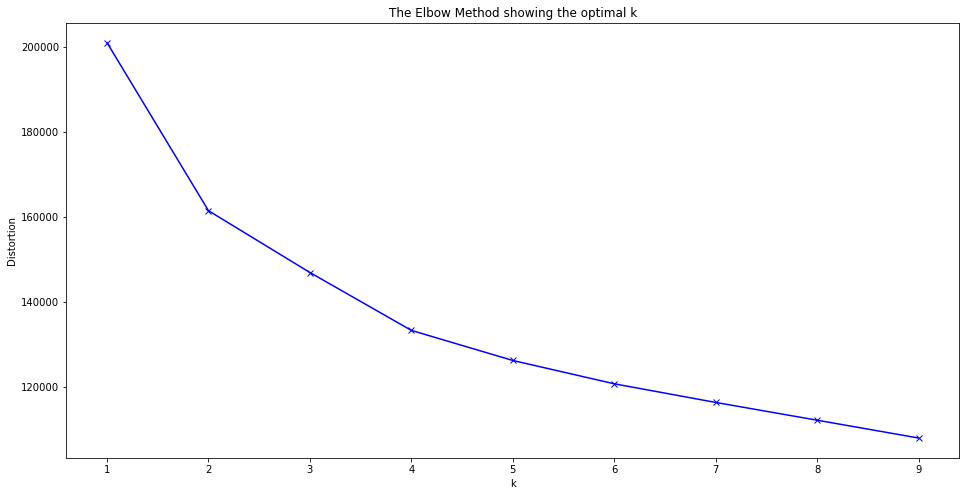

In [34]:
# Elbow method to determine the best k
distortions = []
K = range(1,10)
for k in K:
    cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=k, n_jobs=-1))])
    X = new.select_dtypes(np.number)
    cluster_pipeline.fit(X)
    distortions.append(cluster_pipeline.named_steps['kmeans'].inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [35]:
# Kmeans with 4 clusters
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=4, n_jobs=-1))])
X = new.select_dtypes(np.number)
cluster_pipeline.fit(X)
song_cluster_labels = cluster_pipeline.predict(X)
new['cluster'] = song_cluster_labels

In [36]:
# Visualisation of clusters using tsne
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=False))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = new['genres']
projection['cluster'] = new['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

In [37]:
# Connecting to spotify web API
SPOTIFY_CLIENT_ID = "9da12ab1153d447687087142e147d601"
SPOTIFY_CLIENT_SECRET = "5e8f316b4d6043ef8ea416c8e9fe471d"
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(SPOTIFY_CLIENT_ID,
                                                           SPOTIFY_CLIENT_SECRET))                                            

In [38]:
# Creating a function to find a sold from the spotify web API
def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None
    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [39]:
# Building the recommendation system
number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

# Function to get the required features of the song
def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        
# Function to get the mean vector to determine the cluster in which the song belongs to
def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

# Function to flatten the dictionary inputted by the user which will then contain keys as names and years and values as list of song names and the years.
def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
    return flattened_dict

# Function to recommend songs
def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [40]:
recommend_songs([{'name': 'Steal My Girl', 'year':2014},
                {'name': 'Night Changes', 'year': 2014},
                {'name': 'Galway Girl', 'year': 2017},
                {'name': 'Ready or Not', 'year': 2012},
                {'name': 'Underwater', 'year': 2019}],  new)

[{'name': 'Make You Mine', 'year': 2019, 'artists': "['PUBLIC']"},
 {'name': 'Let Me Go (with Alesso, Florida Georgia Line & watt)',
  'year': 2017,
  'artists': "['Hailee Steinfeld', 'Alesso', 'Florida Georgia Line', 'watt']"},
 {'name': 'Mercury Rising', 'year': 2020, 'artists': "['Tezza']"},
 {'name': 'Sincerely, Me',
  'year': 2017,
  'artists': "['Mike Faist', 'Ben Platt', 'Will Roland']"},
 {'name': 'Gashina', 'year': 2017, 'artists': "['SUNMI']"},
 {'name': 'Good Taste', 'year': 2020, 'artists': "['Levi Hummon']"},
 {'name': 'The Wolf',
  'year': 2016,
  'artists': "['SIAMES', 'Patricia Pacheco']"},
 {'name': 'We Go Together Like', 'year': 2020, 'artists': "['Abby Anderson']"},
 {'name': "6's to 9's (feat. Rationale)",
  'year': 2019,
  'artists': "['Big Wild', 'Rationale']"},
 {'name': 'Quiero Ser', 'year': 2020, 'artists': "['Los Primos del Este']"}]

In [41]:
#Filter based on artist and popularity
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend_artist(self, artist, amount=1,popularity=False,danceability=False):
        z=[]
        for i in range(0,len(self.dataset)):
            if artist in self.dataset.artists.iloc[i]:
                z.append(self.dataset.iloc[i])
        z=pd.DataFrame(z)
        if popularity:
            z = z.sort_values('popularity', ascending=False)
            columns = ['artists', 'name','popularity']
        if danceability:
            z=z.sort_values('danceability',ascending=False)
            columns = ['artists', 'name','danceability']
        return z[columns][:amount]

recommendations = Spotify_Recommendation(data)
recommendations.recommend_artist("Coldplay", 10, popularity=True)  

,artists,name,popularity
15606,['Coldplay'],Yellow,84
16009,['Coldplay'],The Scientist,84
19073,"['The Chainsmokers', 'Coldplay']",Something Just Like This,83
16616,['Coldplay'],Fix You,82
17835,['Coldplay'],Paradise,80
17209,['Coldplay'],Viva La Vida,80
18476,['Coldplay'],A Sky Full of Stars,78
18778,['Coldplay'],Hymn for the Weekend,78
16028,['Coldplay'],Clocks,77
56686,"['The Chainsmokers', 'Coldplay']",Something Just Like This,75


In [42]:
#filter based on artist and danceability
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend_artist(self, artist, amount=1,popularity=False,danceability=False):
        z=[]
        for i in range(0,len(self.dataset)):
            if artist in self.dataset.artists.iloc[i]:
                z.append(self.dataset.iloc[i])
        z=pd.DataFrame(z)
        if popularity:
            z = z.sort_values('popularity', ascending=False)
            columns = ['artists', 'name','popularity']
        if danceability:
            z=z.sort_values('danceability',ascending=False)
            columns = ['artists', 'name','danceability']
        return z[columns][:amount]

recommendations = Spotify_Recommendation(data)
recommendations.recommend_artist("ITZY", 10, danceability=True)  

,artists,name,danceability
124789,['ITZY'],WANNABE,0.809
124622,['ITZY'],달라달라 (DALLA DALLA),0.790
108739,['ITZY'],Not Shy,0.776


In [43]:
#filter based on artist

class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend_artist(self, artist, amount=1,popularity=False,danceability=False):
        z=[]
        for i in range(0,len(self.dataset)):
            if artist in self.dataset.artists.iloc[i]:
                z.append(self.dataset.iloc[i])
        z=pd.DataFrame(z)
        if popularity:
            z = z.sort_values('popularity')
            columns = ['artists', 'name','popularity']
        if danceability:
            z=z.sort_values('danceability',ascending=False)
            columns = ['artists', 'name','danceability']
        columns= ['artists', 'name']
        return z[columns][:amount]

recommendations = Spotify_Recommendation(data)
recommendations.recommend_artist("Harry Styles", 10)

,artists,name
19045,['Harry Styles'],Sign of the Times
19076,['Harry Styles'],Sweet Creature
19102,['Harry Styles'],Kiwi
19125,['Harry Styles'],From the Dining Table
19192,['Harry Styles'],"Girl Crush - Recorded at Metropolis Studios, L..."
19407,['Harry Styles'],Watermelon Sugar
19417,['Harry Styles'],Golden
19421,['Harry Styles'],Falling
19425,['Harry Styles'],Adore You
19517,['Harry Styles'],Lights Up
